<a href="https://colab.research.google.com/github/kiranmuloor/DataScience/blob/master/CNN/Statefarm/2_Statefarm_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import layers
from keras import models

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:

train_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/Statefarms/train"
validation_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/Statefarms/validation"

In [14]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')

Found 5488 images belonging to 10 classes.
Found 4402 images belonging to 10 classes.


In [15]:
from keras.utils.np_utils import to_categorical
num_classes = len(validation_generator.class_indices)
validation_labels = validation_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

validation_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

In [17]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=10,
validation_data=validation_generator)

model.save('/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/StateFarms_1.h5')

Epoch 1/10
100/100 [==============================] - 862s 9s/step - loss: 0.3343 - acc: 0.8943 - val_loss: 0.3416 - val_acc: 0.9000
Epoch 2/10
100/100 [==============================] - 357s 4s/step - loss: 0.2955 - acc: 0.9002 - val_loss: 0.2724 - val_acc: 0.9054
Epoch 3/10
100/100 [==============================] - 309s 3s/step - loss: 0.2433 - acc: 0.9092 - val_loss: 0.1591 - val_acc: 0.9144
Epoch 4/10
100/100 [==============================] - 35s 352ms/step - loss: 0.1940 - acc: 0.9268 - val_loss: 0.2191 - val_acc: 0.9296
Epoch 5/10
100/100 [==============================] - 35s 346ms/step - loss: 0.1639 - acc: 0.9390 - val_loss: 0.0609 - val_acc: 0.9472
Epoch 6/10
100/100 [==============================] - 36s 356ms/step - loss: 0.1256 - acc: 0.9550 - val_loss: 0.1745 - val_acc: 0.9602
Epoch 7/10
100/100 [==============================] - 35s 348ms/step - loss: 0.0977 - acc: 0.9649 - val_loss: 0.0481 - val_acc: 0.9579
Epoch 8/10
100/100 [==============================] - 35s 350

In [18]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

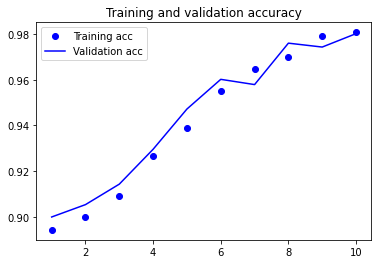

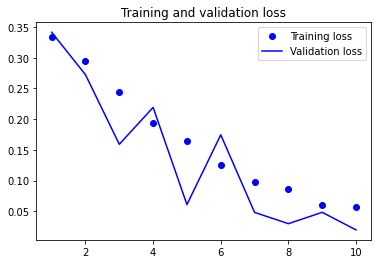

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()